In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import math

In [27]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [28]:
print(df.columns)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


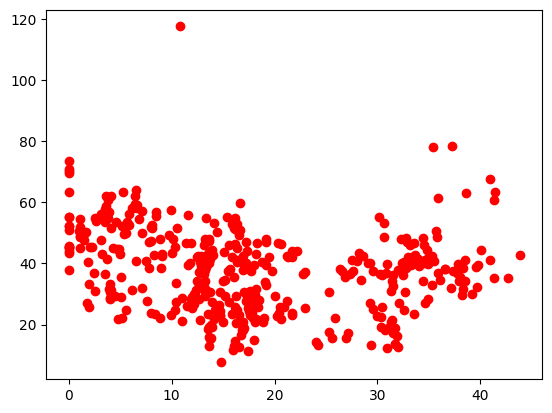

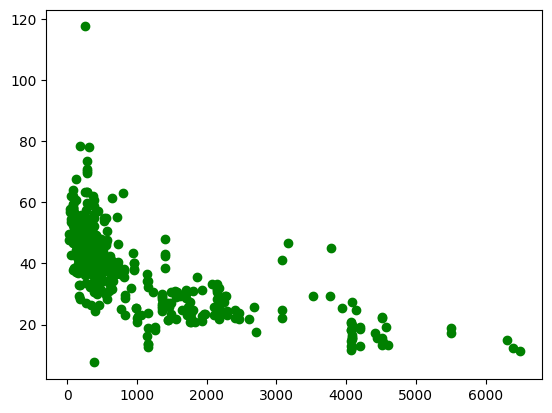

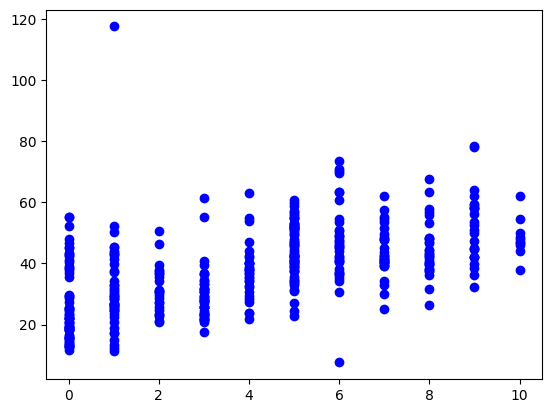

In [29]:
y_label = 'Y house price of unit area'
x1_label = 'X2 house age'; 
x2_label ='X3 distance to the nearest MRT station' ; 
x3_label = 'X4 number of convenience stores'; 

plt.scatter(df[x1_label], df[y_label], c="red")
plt.show()
plt.scatter(df[x2_label], df[y_label], c="green")
plt.show()
plt.scatter(df[x3_label], df[y_label], c="blue")
plt.show()

In [30]:
num_samples = df.shape[0]
num_features = 3

X1 = df[x1_label].to_numpy().reshape((num_samples,1))
X2 = df[x2_label].to_numpy().reshape((num_samples,1))
X3 = df[x3_label].to_numpy().reshape((num_samples,1))

X = np.hstack((np.ones((num_samples,1)),X1,X2,X3))
X[:5]

array([[  1.     ,  32.     ,  84.87882,  10.     ],
       [  1.     ,  19.5    , 306.5947 ,   9.     ],
       [  1.     ,  13.3    , 561.9845 ,   5.     ],
       [  1.     ,  13.3    , 561.9845 ,   5.     ],
       [  1.     ,   5.     , 390.5684 ,   5.     ]])

In [31]:
y = df[y_label].to_numpy().reshape((num_samples,1))
y[:5]

array([[37.9],
       [42.2],
       [47.3],
       [54.8],
       [43.1]])

In [32]:
parameters = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
parameters

array([[ 4.29772862e+01],
       [-2.52855827e-01],
       [-5.37912962e-03],
       [ 1.29744248e+00]])

In [33]:
y_pred = X.dot(parameters)
y_pred[:5]

array([[47.40375034],
       [48.07436724],
       [43.07852862],
       [43.07852862],
       [46.0993014 ]])

In [34]:
print("r2Score:",r2_score(y,y_pred))
print("rmse:", math.sqrt(mean_squared_error(y,y_pred)))

r2Score: 0.5410632980005723
rmse: 9.206557794456211
